In [105]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

In [106]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

In [107]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
mouseid_mouse_metadata = mouse_metadata.sort_values("Mouse ID")
#mouseid_mouse_metadata.head(5)

In [108]:
mouseid_study_results =study_results.sort_values("Mouse ID")
#mouseid_study_results.head(5)


In [109]:
# Combine the data into a single dataset
study_data_complete = pd.merge(mouseid_study_results, mouseid_mouse_metadata, how = 'left', on="Mouse ID")
#study_data_complete.head(10)

In [110]:
df = pd.DataFrame(study_data_complete).set_index('Drug Regimen')
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Infubinol,a203,0,45.000000,0,Female,20,23
Infubinol,a203,5,48.508468,0,Female,20,23
Infubinol,a203,25,56.793208,1,Female,20,23
Infubinol,a203,40,63.593490,2,Female,20,23
Infubinol,a203,35,61.931650,2,Female,20,23


In [111]:
sortby_time= study_data_complete.groupby("Timepoint").mean()
#sortby_time

In [112]:
weight_vs_avgtumor = study_data_complete.groupby('Weight (g)').mean()
#weight_vs_avgtumor

In [113]:
groupby_regimen = study_data_complete.groupby(['Drug Regimen'])
regimen_average_study_data_complete = study_data_complete.groupby(['Drug Regimen']).mean()
tumor_regimen_average_study_data_complete = regimen_average_study_data_complete['Tumor Volume (mm3)']
#tumor_regimen_average_study_data_complete

In [114]:
groupby_mouse = study_data_complete.groupby(['Mouse ID']).sum()
tumor_groupby_mouse = groupby_mouse['Tumor Volume (mm3)']
tumor_groupby_mouse
d = {'mouse':tumor_groupby_mouse['a203']}
d

{'mouse': 563.1270770499999}

In [115]:
d = study_data_complete['Sex']
sex_count = d.value_counts()
#sex_count

In [116]:
regimen_median_study_data_complete = study_data_complete.groupby(['Drug Regimen']).median()
tumor_regimen_median_study_data_complete = regimen_median_study_data_complete['Tumor Volume (mm3)']
#tumor_regimen_median_study_data_complete


In [117]:
var_numpy_tumor = np.var(study_data_complete['Tumor Volume (mm3)'],ddof = 0)
var_numpy_tumor

79.07427999025784

In [118]:
mode_scipy = sts.mode(study_data_complete['Tumor Volume (mm3)'])
mode_scipy

ModeResult(mode=array([45.]), count=array([250]))

In [119]:
sd_numpy_tumor = np.std(study_data_complete['Tumor Volume (mm3)'],ddof = 0)
sd_numpy_tumor

8.892372011463411

In [120]:
count = groupby_regimen['Drug Regimen'].count()
#count
drug_regimen_count =groupby_regimen['Drug Regimen'].count().count()
#count

In [121]:
summary = pd.DataFrame({"Number of Data Points":count,
                                   "Average Tumor Size":tumor_regimen_average_study_data_complete,
                       "Median Tumor Size":tumor_regimen_median_study_data_complete})
summary

,Number of Data Points,Average Tumor Size,Median Tumor Size
Drug Regimen,,,
Capomulin,230,40.675741,41.557809
Ceftamin,178,52.591172,51.776157
Infubinol,178,52.884795,51.820584
Ketapril,188,55.235638,53.698743
Naftisol,186,54.331565,52.509285
Placebo,181,54.033581,52.288934
Propriva,161,52.322552,50.854632
Ramicane,228,40.216745,40.673236
Stelasyn,181,54.233149,52.431737


In [ ]:
x_axis = np.arange(int(drug_regimen_count))

plt.title("Data Points Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.xlim(-0.75, int(drug_regimen_count))
plt.ylim(0, max(count) + 5)

plt.bar(x_axis, count, facecolor="red", alpha=.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])


plt.savefig("Images/Data_Points.png")
plt.show()


<IPython.core.display.Javascript object>


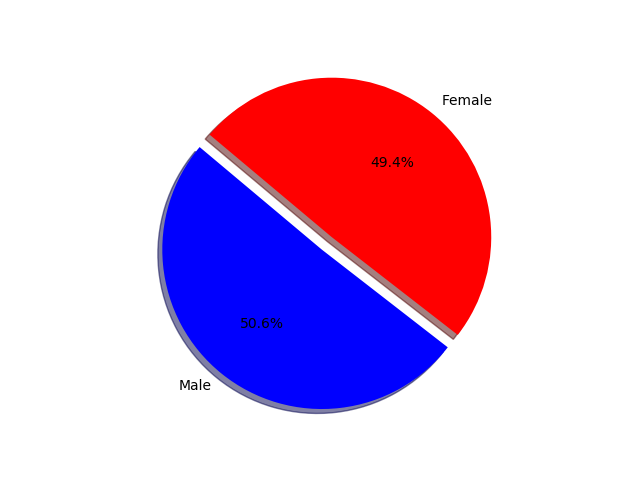

In [131]:
fig

Sex = ["Male", "Female"]
colors = ["blue","red",]
explode = (0.1,0)
plt.pie(sex_count, labels= Sex, colors=colors,
        autopct="%1.1f%%", explode = explode, shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("Images/PyPies.png")
plt.show()


In [85]:
mice = pd.DataFrame({"Tumor Size by Mouse":tumor_groupby_mouse})
#mice

In [86]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine
#if there are any potential outliers. 

#fig1, ax1 = plt.subplots()
#ax1.set_title('Tumor Volume By Mouse')
#ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.boxplot(mice)
#plt.show()

In [87]:
quartiles = mice.quantile([0.25, 0.5, 0.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of Tumor Size is: {lowerq}")
#print(f"The upper quartile of Tumor Size is: {upperq}")
#print(f"The interquartile range of Tumor Sizeis: {iqr}")
print(f"The the median of Tumor Size is: {quartiles[.5]} ")

KeyError: 0.5

In [88]:
# Generate a box plot of the final tumor volume 
#of each mouse across four regimens of interest

In [64]:
#fig1, ax1 = plt.subplots()
#ax1.set_title()
#ax1.set_ylabel()
#ax1.boxplot()
#plt.show()

In [65]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [66]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [67]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen